# To ignore warning


In [1]:
import warnings
warnings.filterwarnings("ignore")


# Importing important data visualization libraries

In [2]:
import numpy as np
import pandas as pd
import os
import shutil # The shutil module offers a number of high-level operations on files
import glob
import matplotlib.pyplot as plt

# Mounting the dataset from Gdrive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Unzipping the dataset to be used by anyone

In [4]:
!unzip "/content/gdrive/MyDrive/X-Ray_Image_DataSets.zip"

Archive:  /content/gdrive/MyDrive/X-Ray_Image_DataSets.zip
   creating: X-Ray_Image_DataSet/
   creating: X-Ray_Image_DataSet/COVID/
  inflating: X-Ray_Image_DataSet/COVID/COVID-2.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-26.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-4.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-5.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-6.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-7.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-8.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-9.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-10.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-11.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-12.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-13.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-14.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-15.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-16.png  
  inflating: X-Ray_Image_DataSet/COVID/COVID-17.png  
  inflatin

# Working with images + image_ROUTES

In [5]:
# !rm -rf '/content/X-Ray_Image_DataSet/Viral Pneumonia'

In [6]:
ROOT_DIR = "/content/X-Ray_Image_DataSet"
imgs = ['COVID','Normal']

NEW_DIR = "/content/all_images/"

In [7]:
# copying all the images to a new directory

if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")

    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")
    

In [8]:
map = {'COVID':0,'Normal':0}

print(map)

for i in imgs:
  for cnt in glob.iglob(NEW_DIR+i+"*"):
    map[i] += 1

print(map)

{'COVID': 0, 'Normal': 0}
{'COVID': 125, 'Normal': 500}


# Dividing the datasets into 3 Phases 


In [ ]:
# if not os.path.exists(NEW_DIR+"train_test_split/"):

#   os.makedirs(NEW_DIR+"train_test_split/")

#   os.makedirs(NEW_DIR+"train_test_split/train/Normal")
#   os.makedirs(NEW_DIR+"train_test_split/train/Covid")

#   os.makedirs(NEW_DIR+"train_test_split/test/Normal")
#   os.makedirs(NEW_DIR+"train_test_split/test/Covid")

#   os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
#   os.makedirs(NEW_DIR+"train_test_split/validation/Covid")


#   # Train Data
#   for i in np.random.choice(replace= False , size= 100 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
#     shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
#     os.remove(i)

#   for i in np.random.choice(replace= False , size= 150 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
#     shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
#     os.remove(i)

#   # for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
#   #   shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
#   #   os.remove(i)



#   # Validation Data
#   for i in np.random.choice(replace= False , size= 20 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
#     shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
#     os.remove(i)

#   for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
#     shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
#     os.remove(i)

#   # for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
#   #   shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
#   #   os.remove(i)




#   # Test Data
#   for i in np.random.choice(replace= False , size= 5 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
#     shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
#     os.remove(i)

#   for i in np.random.choice(replace= False , size= 100 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
#     shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
#     os.remove(i)

#   # for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
#   #   shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
#   #   os.remove(i)


In [9]:
pip install split-folders

In [10]:
import splitfolders 

In [11]:
input_folder = '/content/X-Ray_Image_DataSet/'

In [12]:
splitfolders.ratio(input_folder, output='/content/all_images/train_test_split', seed=43, ratio=(.7, .2, .1), group_prefix=None) # default values

Copying files: 625 files [00:00, 1233.78 files/s]


# Model tarining + Routes

In [13]:
train_path  = "/content/all_images/train_test_split/train"
valid_path  = "/content/all_images/train_test_split/val"
test_path   = "/content/all_images/train_test_split/test"

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [15]:
train_data_generation = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, 
                                           shear_range= 0.2 , rescale= 1./255)
train = train_data_generation.flow_from_directory(directory= train_path , target_size=(224,224))

Found 437 images belonging to 2 classes.


In [16]:
validation_data_generation = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, 
                                           shear_range= 0.2 , rescale= 1./255)
valid = validation_data_generation.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 125 images belonging to 2 classes.


In [17]:
test_data_generation = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = test_data_generation.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 63 images belonging to 2 classes.


In [18]:
from sklearn.model_selection import train_test_split

In [29]:
# X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.33) 

ValueError: ignored

In [19]:
X_train, y_train = train.next()
X_test, y_test = valid.next()

In [20]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Activation, Dense

In [21]:
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, MaxPool2D


In [22]:

from __future__ import print_function, division
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import pandas as pd

In [23]:
model = Sequential()
model.add(Conv2D(16,(5,5),padding='valid',input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Dropout(0.4))
model.add(Conv2D(32,(5,5),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Dropout(0.6))
model.add(Conv2D(64,(5,5),padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

model_feat = Model(inputs=model.input,outputs=model.output)
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(X_test)

In [24]:
y_pred = model.predict(X_test, batch_size=32)

In [25]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

In [26]:
y_pred_bin, y_test_bin

(array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1]))

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(feat_train,np.argmax(y_train,axis=-1))

knn.score(feat_test,np.argmax(y_test,axis=1))

0.875

Confusion Matrix without Normalization


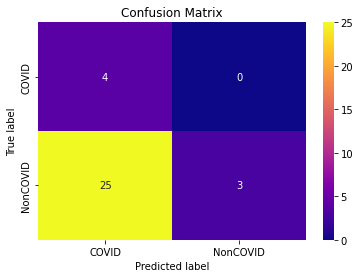

Confusion Matrix with Normalized Values


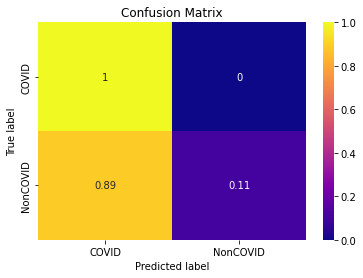

In [29]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','NonCOVID']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
train.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
class_type = {0: 'Covid', 1: 'Normal'}

In [ ]:
t_img , label = train.next()

In [ ]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


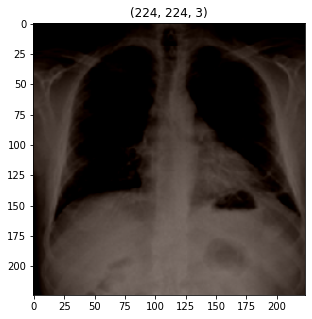

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


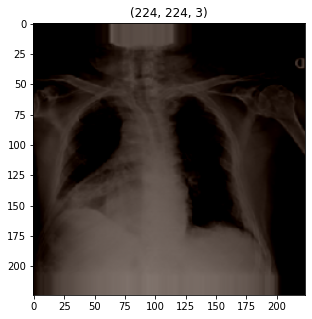

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


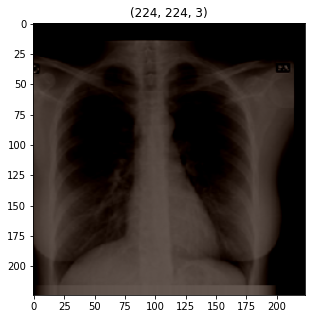

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


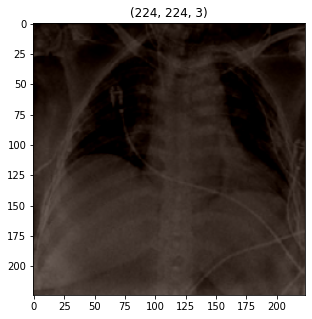

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


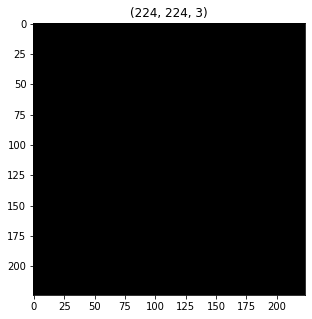

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


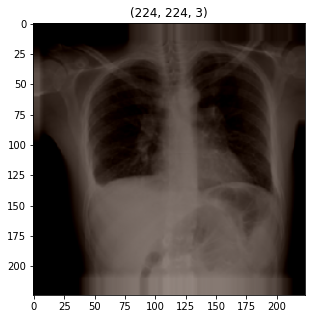

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


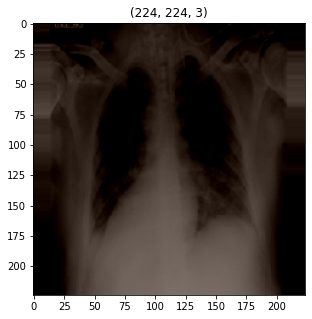

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


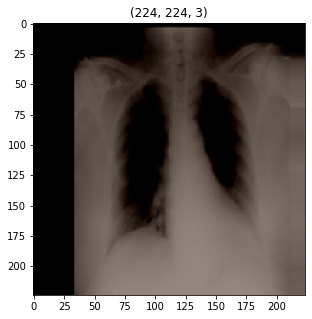

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


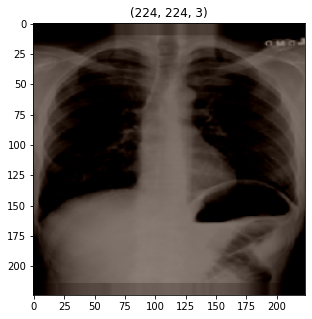

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


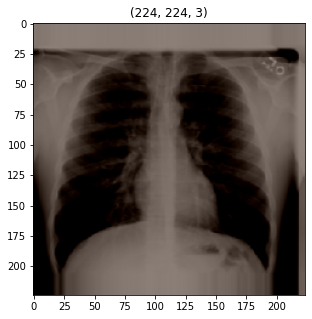

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


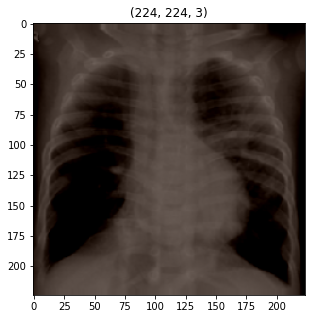

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


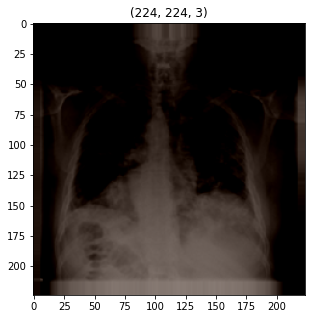

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


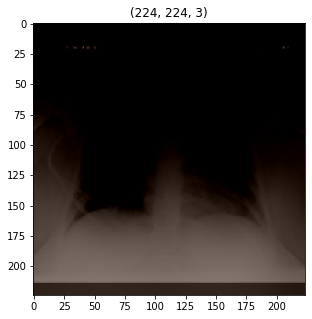

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


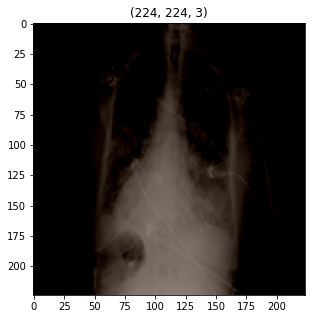

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


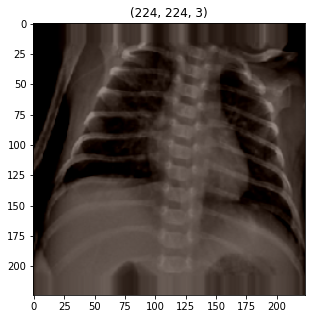

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


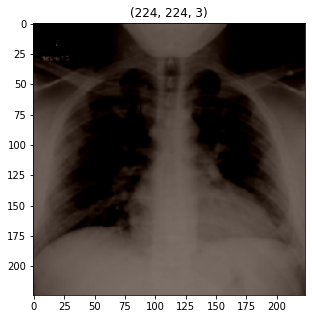

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


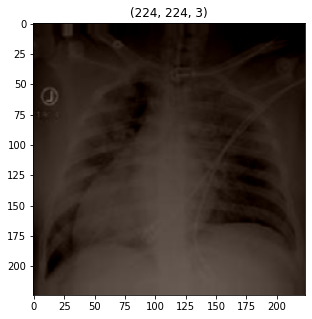

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


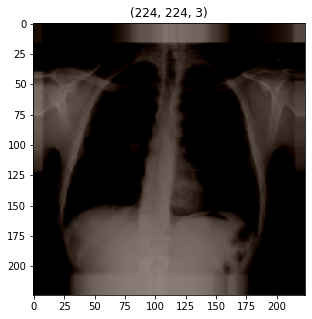

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


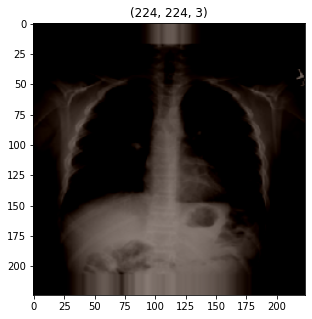

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


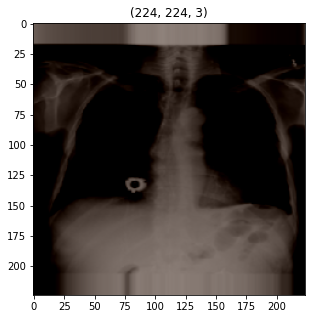

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


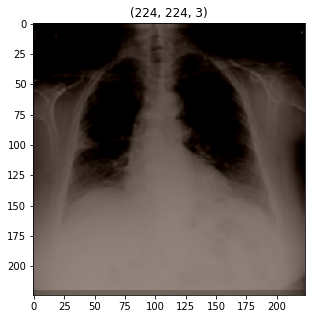

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


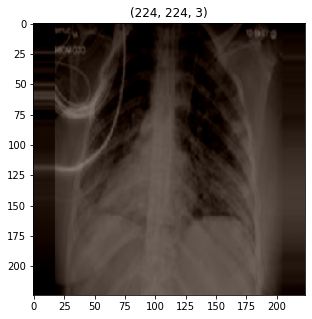

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


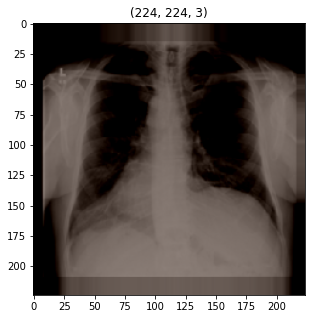

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


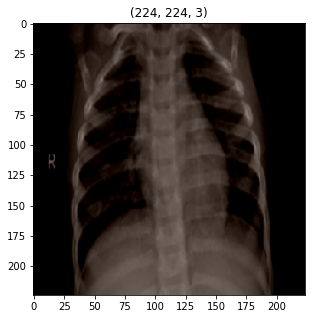

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


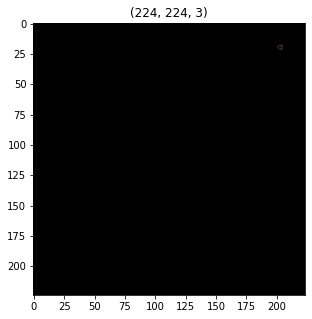

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


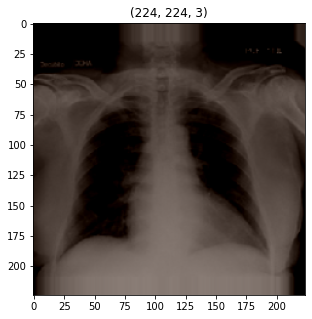

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


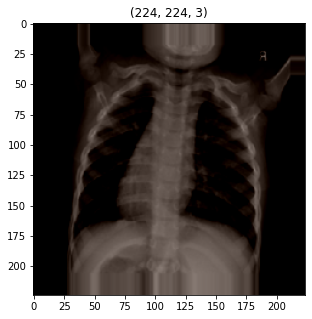

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


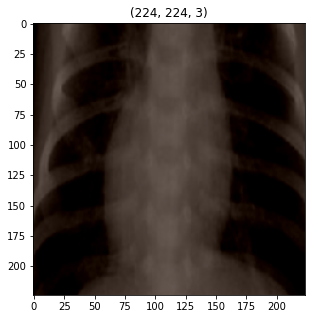

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


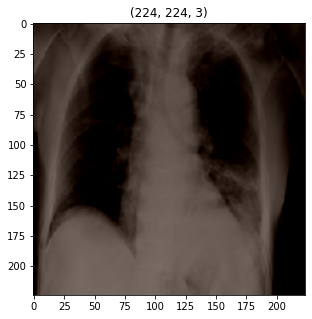

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


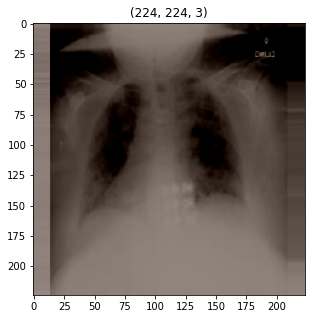

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


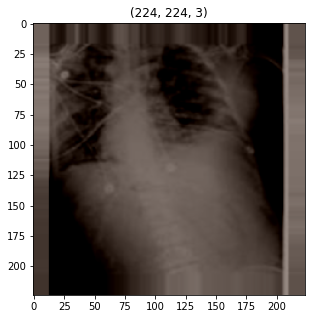

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


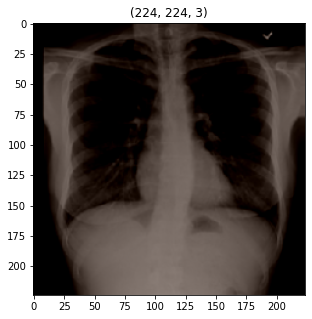

In [ ]:
plotImages(t_img, label)

# VGG19


In [ ]:
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, MaxPool2D

In [ ]:
vgg = VGG19(input_shape=(224, 224, 3), include_top=False);

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [ ]:
hist = model.fit_generator(train, steps_per_epoch=10, epochs=10, validation_data=valid, validation_steps=32, callbacks=[es, mc])

Epoch 1/10
10/10 [==============================] - 852s 92s/step - loss: 1.4571 - accuracy: 0.5531 - val_loss: 0.7498 - val_accuracy: 0.6091

Epoch 00001: val_accuracy improved from -inf to 0.60913, saving model to bestmodel.h5
Epoch 2/10
10/10 [==============================] - 856s 93s/step - loss: 0.5938 - accuracy: 0.6938 - val_loss: 0.5290 - val_accuracy: 0.7768

Epoch 00002: val_accuracy improved from 0.60913 to 0.77679, saving model to bestmodel.h5
Epoch 3/10
10/10 [==============================] - 845s 92s/step - loss: 0.5146 - accuracy: 0.7625 - val_loss: 0.4536 - val_accuracy: 0.7927

Epoch 00003: val_accuracy improved from 0.77679 to 0.79266, saving model to bestmodel.h5
Epoch 4/10
10/10 [==============================] - 843s 91s/step - loss: 0.4899 - accuracy: 0.7594 - val_loss: 0.4826 - val_accuracy: 0.7738

Epoch 00004: val_accuracy did not improve from 0.79266
Epoch 5/10
10/10 [==============================] - 843s 91s/step - loss: 0.4218 - accuracy: 0.8125 - val_los

In [ ]:
from keras.models import  load_model
model = load_model("bestmodel.h5")

# Model performance

In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

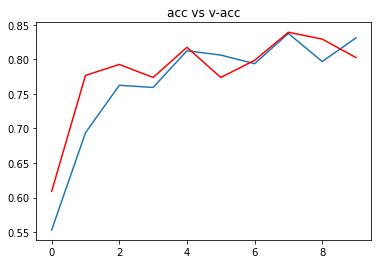

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

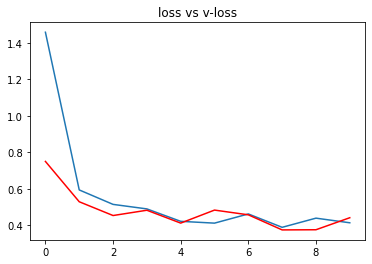

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
from keras.preprocessing import image

def get_img_array(img_path):
  path = img_path
  img = image.load_img(path, target_size=(224, 224, 3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img, axis = 0)

  return img

The given X-Ray image is of type = Covid

The chances of image being Covid is : 51.71717405319214 percent

The chances of image being Normal is : 24.04874861240387 percent


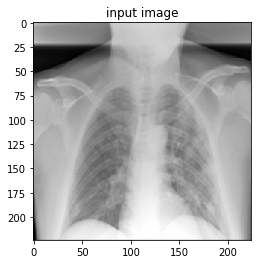

In [ ]:
path = "/content/all_images/COVID-1478.png"

img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]

print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

#VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Dropout, MaxPool2D

In [ ]:
vgg1 = VGG16(input_shape=(224, 224, 3), include_top=False);

In [ ]:
for layer in vgg1.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [ ]:
x = Flatten()(vgg1.output)

In [ ]:
x = Flatten()(vgg1.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model1 = Model(vgg1.input, x)

In [ ]:
model1.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [ ]:
hist = model1.fit_generator(train, steps_per_epoch=10, epochs=10, validation_data=valid, validation_steps=32, callbacks=[es, mc])

Epoch 1/10
10/10 [==============================] - 678s 73s/step - loss: 0.7554 - accuracy: 0.6219 - val_loss: 0.6023 - val_accuracy: 0.6875

Epoch 00001: val_accuracy improved from -inf to 0.68750, saving model to bestmodel.h5
Epoch 2/10
10/10 [==============================] - 676s 73s/step - loss: 0.5389 - accuracy: 0.7469 - val_loss: 0.4769 - val_accuracy: 0.7976

Epoch 00002: val_accuracy improved from 0.68750 to 0.79762, saving model to bestmodel.h5
Epoch 3/10
10/10 [==============================] - 672s 73s/step - loss: 0.4213 - accuracy: 0.8397 - val_loss: 0.4002 - val_accuracy: 0.8214

Epoch 00003: val_accuracy improved from 0.79762 to 0.82143, saving model to bestmodel.h5
Epoch 4/10
10/10 [==============================] - 681s 74s/step - loss: 0.3796 - accuracy: 0.8375 - val_loss: 0.3719 - val_accuracy: 0.8393

Epoch 00004: val_accuracy improved from 0.82143 to 0.83929, saving model to bestmodel.h5
Epoch 5/10
10/10 [==============================] - 681s 74s/step - loss: 0

In [ ]:
from keras.models import  load_model
model = load_model("bestmodel.h5")

In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

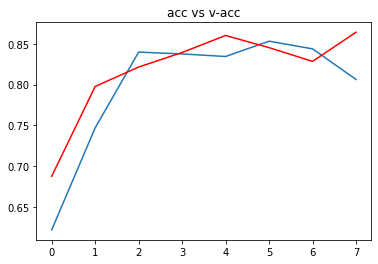

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

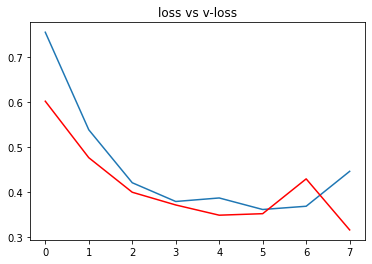

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
from keras.preprocessing import image

def get_img_array(img_path):
  path = img_path
  img = image.load_img(path, target_size=(224, 224, 3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img, axis = 0)

  return img

The given X-Ray image is of type = Covid

The chances of image being Covid is : 77.04485654830933 percent

The chances of image being Normal is : 37.118080258369446 percent


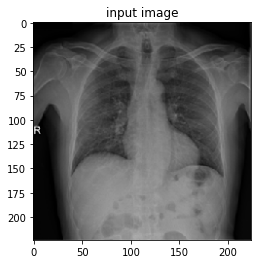

In [ ]:
path = "/content/all_images/COVID-2577.png"

img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]

print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

#GRAD-CAM Visualizations



In [ ]:
import tensorflow as tf


In [ ]:
# this function is udes to generate the heat map of aan image
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [ ]:
def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded 
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [ ]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "conv5_block3_3_conv", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """
  
  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  plt.title("the heat map of the image is ")
  plt.imshow(heatmap)
  plt.show()
  print()
  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing region on interest")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

In [ ]:

#predictions
# provide the path of any image from google or any other scource 
# the path is already defigned above , but you can also provide the path here to avoid scrolling up 

# for covid image :  path:- provide any image from google or provide image from all image folder
path = "/content/all_images/COVID-2554.png"

image_prediction_and_visualization(path)

ValueError: ignored

In [ ]:
# for normal image :  path:- provide any image from google or provide image from all image folder
path = "/content/all_images/train_test_split/validation/Normal/Normal-1004.png"

image_prediction_and_visualization(path)

# for a healthey chest x-Ray heap map will be white thus the x-ray will look blue

ValueError: ignored